In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
pd.set_option('display.max_rows', 10)
df = pd.read_csv('headbrain.csv')
df = df[['Head Size(cm^3)', 'Brain Weight(grams)']]

In [90]:
df.shape

(237, 2)

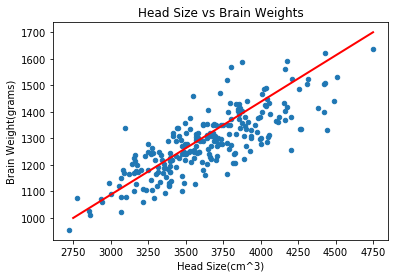

In [91]:
df.plot(kind='scatter',
       x='Head Size(cm^3)',
       y='Brain Weight(grams)',
       title='Head Size vs Brain Weights')
plt.plot([2750, 4750], [1000, 1700], color='red', linewidth=2)

In [92]:
def line(x, w=0, b=0):
    return x * w + b

In [96]:
x = np.linspace(2750, 4750, 200)

In [97]:
x

array([2750.        , 2760.05025126, 2770.10050251, 2780.15075377,
       2790.20100503, 2800.25125628, 2810.30150754, 2820.35175879,
       2830.40201005, 2840.45226131, 2850.50251256, 2860.55276382,
       2870.60301508, 2880.65326633, 2890.70351759, 2900.75376884,
       2910.8040201 , 2920.85427136, 2930.90452261, 2940.95477387,
       2951.00502513, 2961.05527638, 2971.10552764, 2981.15577889,
       2991.20603015, 3001.25628141, 3011.30653266, 3021.35678392,
       3031.40703518, 3041.45728643, 3051.50753769, 3061.55778894,
       3071.6080402 , 3081.65829146, 3091.70854271, 3101.75879397,
       3111.80904523, 3121.85929648, 3131.90954774, 3141.95979899,
       3152.01005025, 3162.06030151, 3172.11055276, 3182.16080402,
       3192.21105528, 3202.26130653, 3212.31155779, 3222.36180905,
       3232.4120603 , 3242.46231156, 3252.51256281, 3262.56281407,
       3272.61306533, 3282.66331658, 3292.71356784, 3302.7638191 ,
       3312.81407035, 3322.86432161, 3332.91457286, 3342.96482

In [103]:
yhat = line(x, w=0, b=1000)

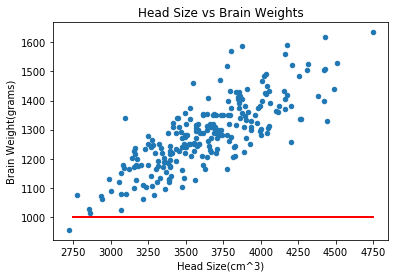

In [104]:
df.plot(kind='scatter',
       x='Head Size(cm^3)',
       y='Brain Weight(grams)',
       title='Head Size vs Brain Weights')
plt.plot(x, yhat, color='red', linewidth=2)

In [19]:
def mean_squared_error(y_true, y_pred):
    s = (y_true- y_pred) ** 2
    return s.mean()

In [20]:
X = df [ [ 'Head Size(cm^3)']].values
y_true = df['Brain Weight(grams)'].values
y_pred = line(X)

In [21]:
y_true.shape

(237,)

In [23]:
y_pred.shape

(237, 1)

In [24]:
mean_squared_error(y_true, y_pred.ravel())

1660184.9240506329

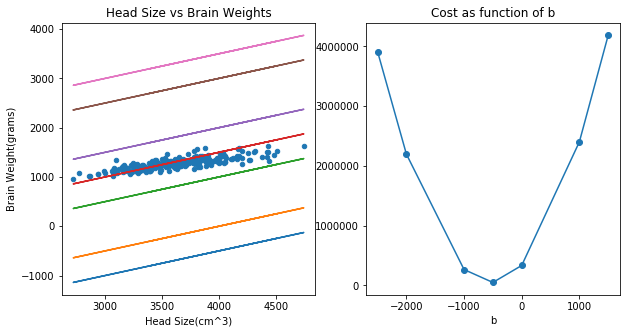

In [29]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Head Size(cm^3)',
       y='Brain Weight(grams)',
       title='Head Size vs Brain Weights', ax=ax1)

### explore bias
bbs = np.array([-2500, -2000, -1000, -500, 0, 1000, 1500])
mses = []
for b in bbs:
    y_pred = line(X, w=0.5, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)


ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as function of b')
plt.xlabel('b');

In [34]:
data = pd.read_csv('student.csv')

In [35]:
data

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['Math', 'Reading']]
X

,Math,Reading
0,48,68
1,62,81
2,79,80
3,76,83
4,59,64
...,...,...
995,72,74
996,73,86
997,89,87
998,83,82


In [56]:
Y = data['Writing']

In [57]:
reg = LinearRegression()

# Data fitting
reg = reg.fit(X, Y)

In [61]:
# Y Prediction
y_pred = reg.predict(X)
b0 = reg.intercept_
b1, b2 = reg.coef_
print(b0, b1, b2)

-1.4624373849419783 0.09600221211314114 0.9104998931166807


In [59]:
rmse = np.sqrt(mean_squared_error(Y, y_pred))
r2 = reg.score(X, Y)
print(rmse, r2)

4.572887051836439 0.9098901726717316


In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
rknn = KNeighborsRegressor(n_neighbors=48)

# Data fitting
rknn = rknn.fit(X, Y)

In [83]:
# Y Prediction
yknn_pred = rknn.predict(X)
bknn0 = reg.intercept_
bknn1, bknn2 = reg.coef_
print(bknn0, bknn1, bknn2)

-1.4624373849419783 0.09600221211314114 0.9104998931166807


In [84]:
knnrmse = np.sqrt(mean_squared_error(Y, y_pred))
knnr2 = rknn.score(X, Y)
print(knnrmse, knnr2)

4.572887051836439 0.901347739531129
